<a href="https://colab.research.google.com/github/dawoodwasif/Object-Detection-Model-Comparison-Toolkit/blob/main/Custom_training_YOLOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Clone repo and install dependencies

In [ ]:
# clone YOLOR repository
!git clone https://github.com/roboflow-ai/yolor
%cd yolor
!git reset --hard eb3ef0b7472413d6740f5cde39beb1a2f5b8b5d1

# install dependencies as necessary
!pip install -qr requirements.txt

Cloning into 'yolor'...
remote: Enumerating objects: 387, done.
remote: Total 387 (delta 0), reused 0 (delta 0), pack-reused 387
Receiving objects: 100% (387/387), 2.97 MiB | 3.26 MiB/s, done.
Resolving deltas: 100% (173/173), done.
/content/yolor
HEAD is now at eb3ef0b indentation
     |████████████████████████████████| 596 kB 29.7 MB/s 
     |████████████████████████████████| 776.7 MB 4.5 kB/s 
     |████████████████████████████████| 12.7 MB 29.8 MB/s 
     |████████████████████████████████| 1.5 MB 68.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.7.0 which is incompatible.
torchaudio 0.12.0+cu113 requires torch==1.12.0, but you have torch 1.7.0 which is incompatible.
fastai 2.7.7 requires torchvision>=0.8.2, but you have torchvision 0.8.1 which is incompatible.


In [ ]:
# Install Mish CUDA
!git clone https://github.com/JunnYu/mish-cuda
%cd mish-cuda
!git reset --hard 6f38976064cbcc4782f4212d7c0c5f6dd5e315a8
!python setup.py build install
%cd ..

Cloning into 'mish-cuda'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 195 (delta 7), reused 79 (delta 3), pack-reused 107
Receiving objects: 100% (195/195), 208.77 KiB | 950.00 KiB/s, done.
Resolving deltas: 100% (56/56), done.
/content/yolor/mish-cuda
HEAD is now at 6f38976 Update README.md
/usr/lib/python3.7/distutils/extension.py:131: UserWarning: Unknown Extension options: 'headers'
  warnings.warn(msg)
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/mish_cuda
copying src/mish_cuda/__init__.py -> build/lib.linux-x86_64-3.7/mish_cuda
running egg_info
creating src/mish_cuda.egg-info
writing src/mish_cuda.egg-info/PKG-INFO
writing dependency_links to src/mish_cuda.egg-info/dependency_links.txt
writing requirements to src/mish_cuda.egg-info/requires.txt
writing top-level names to src/mish_cuda.egg-info/top_level

## 2. Download dataset

In [ ]:
!curl -L "https://app.roboflow.com/ds/RctkWgzkOW?key=jH9NT468AE" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   1527      0 --:--:-- --:--:-- --:--:--  1527
100 44.6M  100 44.6M    0     0  19.6M      0  0:00:02  0:00:02 --:--:-- 30.1M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/IMG_9539_jpg.rf.af9ef0c4d68f861e93eebab8b6263b5e.jpg  
 extracting: test/images/IMG_9549_jpg.rf.94dd57094b08740bf3f2b0ab7826dd92.jpg  
 extracting: test/images/IMG_9600_jpg.rf.8bdcacb0a00351e094a16fc854d1ff5f.jpg  
 extracting: test/images/IMG_9621_jpg.rf.7bec744a978468399cb0552f35c74fc5.jpg  
 extracting: test/images/IMG_9637_jpg.rf.9fc008447a2243698c6355e500a23cf0.jpg  
 extracting: test/images/IMG_9638_jpg.rf.8528f86754508343fe6c6e2b283252eb.jpg  
 extracting: test/imag

In [ ]:
!mv /content/yolor/valid /content/valid
!mv /content/yolor/train /content/train
!mv /content/yolor/test /content/test

In [ ]:
%cd /content/yolor
!bash scripts/get_pretrain.sh

/content/yolor
awk: cannot open ./cookie (No such file or directory)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2370    0  2370    0     0   1692      0 --:--:--  0:00:01 --:--:--  1691
rm: cannot remove './cookie': No such file or directory
awk: cannot open ./cookie (No such file or directory)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2370    0  2370    0     0   7032      0 --:--:-- --:--:-- --:--:--  7011
rm: cannot remove './cookie': No such file or directory


## 3. Train model

In [ ]:
!python3 train.py --weights "yolor_p6.pt" --cfg yolor_custom.cfg --data data.yaml --batch-size 12 --device 0 --name data_custom --epochs 100 --img-size 640

Using torch 1.7.0 CUDA:0 (Tesla T4, 15109MB)

Namespace(adam=False, batch_size=12, bucket='', cache_images=False, cfg='yolor_custom.cfg', data='data.yaml', device='0', epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.1280.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_imgs=16, multi_scale=False, name='data_custom', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/data_custom2', single_cls=False, sync_bn=False, total_batch_size=12, weights='yolor_p6.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
NumExpr defaulting to 2 threads.
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h

## 4. Detect and test model

In [ ]:
!python detect.py --source inference/images/test.jpg --cfg cfg/yolor_p6.cfg --weights yolor_p6.pt --conf 0.25 --img-size 1280 --device 0

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolor_p6.cfg', classes=None, conf_thres=0.25, device='0', img_size=1280, iou_thres=0.5, names='data/coco.names', output='inference/output', save_txt=False, source='inference/images/test.jpg', update=False, view_img=False, weights=['yolor_p6.pt'])
image 1/1 /content/yolor/inference/images/test.jpg: 960x1280 3 persons, 2 bicycles, 24 cars, 1 motorcycles, 3 trucks, 1 traffic lights, Done. (0.055s)
Results saved to inference/output
Done. (0.548s)


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

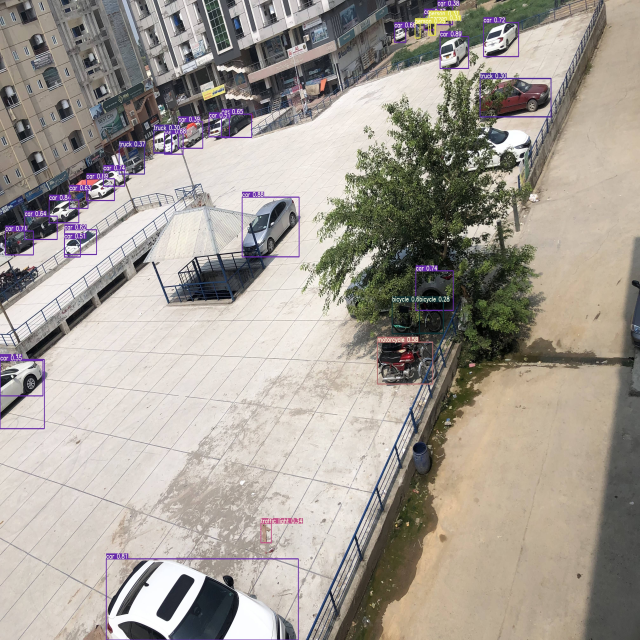

In [ ]:
img = cv2.imread("/content/yolor/inference/output/test.jpg")
resized = cv2.resize(img, (640,640), interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

In [ ]:
!python3 detect.py  --cfg yolor_custom.cfg --weights runs/train/data_custom/weights/best.pt --device 0 --source inference/images/test.jpg --names data_custom.names

Namespace(agnostic_nms=False, augment=False, cfg='yolor_custom.cfg', classes=None, conf_thres=0.4, device='0', img_size=1280, iou_thres=0.5, names='data_custom.names', output='inference/output', save_txt=False, source='inference/images/test.jpg', update=False, view_img=False, weights=['runs/train/data_custom/weights/best.pt'])
image 1/1 /content/yolor/inference/images/test.jpg: 960x1280 25 cars, Done. (0.054s)
Results saved to inference/output
Done. (0.533s)


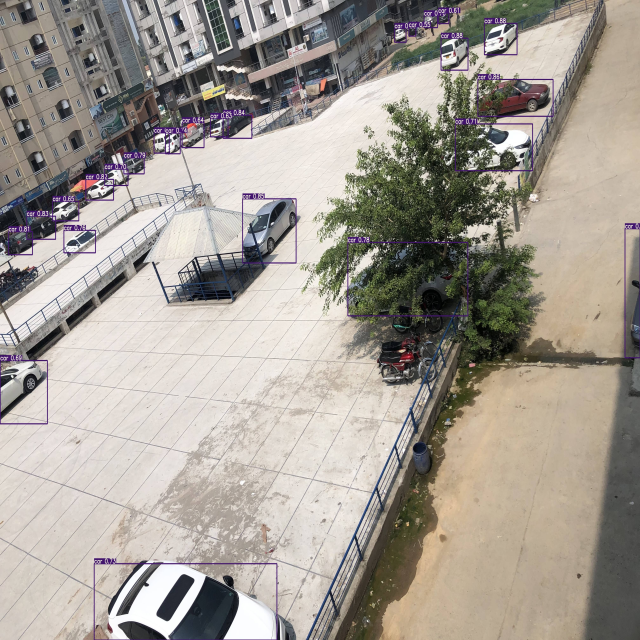

In [ ]:
img = cv2.imread("/content/yolor/inference/output/test.jpg")
resized = cv2.resize(img, (640,640), interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

In [ ]:
! python test.py --data data_custom.yaml --img 1280 --batch 32 --conf 0.001 --iou 0.65 --device 0 --cfg yolor_custom.cfg --weights runs/train/data_custom/weights/best.pt --name yolor_custom_val

Namespace(augment=False, batch_size=32, cfg='yolor_custom.cfg', conf_thres=0.001, data='data_custom.yaml', device='0', exist_ok=False, img_size=1280, iou_thres=0.65, name='yolor_custom_val', names='data/coco.names', project='runs/test', save_conf=False, save_json=False, save_txt=False, single_cls=False, task='val', verbose=False, weights=['runs/train/data_custom/weights/best.pt'])
Using torch 1.7.0 CUDA:0 (Tesla T4, 15109MB)

Model Summary: 665 layers, 36838416 parameters, 36838416 gradients, 80.647372800 GFLOPS
Scanning labels ../valid/labels.cache3 (80 found, 0 missing, 0 empty, 0 duplicate, for 80 images): 80it [00:00, 10893.94it/s]
               Class      Images     Targets           P           R      mAP@.5  mAP@.5:.95: 100% 3/3 [00:14<00:00,  4.95s/it]
                 all          80     2.7e+03       0.599        0.77       0.787       0.383
Speed: 52.1/3.8/55.9 ms inference/NMS/total per 1280x1280 image at batch-size 32
Results saved to runs/test/yolor_custom_val3


In [ ]:
# 1. Upload test img, yolor_custom.cfg ,data_custom.yaml, data_custom.names & yolo_p6.pt in yolo folder
# 2. download weights from https://drive.google.com/uc?export=download&id=1Tdn3yqpZ79X7R1Ql0zNlNScB1Dv9Fp76 and move to yolor dir

In [ ]:
# 3.update function in utils/plot.py
"""
def output_to_target(output, width, height):
    # Convert model output to target format [batch_id, class_id, x, y, w, h, conf]
    if isinstance(output, torch.Tensor):
        output = output.cpu().numpy()

    targets = []
    for i, o in enumerate(output):
        if o is not None:
            for pred in o:
                pred = pred.cpu()
                box = pred[:4]
                w = (box[2] - box[0]) / width
                h = (box[3] - box[1]) / height
                x = box[0] / width + w / 2
                y = box[1] / height + h / 2
                conf = pred[4]
                cls = int(pred[5])

                targets.append([i, cls, x, y, w, h, conf])

    return np.array(targets)

"""
# help from: https://medium.com/augmented-startups/train-yolor-on-custom-data-f129391bd3d6